In [1]:
import numpy as np


class MockAgilentE44nnInstrument():
    
    def write(self, input_):
        print(f'{input_=}')
    
    def read(self):
        return input('... : ')
    
    def query(self, query):
        if query == '*OPC?':
            return True
        elif query == ':SWEep:POINts?':
            return '8192'
        elif query == ':INST:SEL?':
            return 'SA'
        elif query == ':FREQuency:SPAN?':
            return '10e6'
        elif query == ':FREQuency:STARt?':
            return '995e6'
        elif query == ':FREQuency:STOP?':
            return '1005e6'
        elif query == ':UNIT:POWer?':
            return 'DBM'
        elif query == ':CORRection:OFFS:MAGN?':
            return '0'
        elif query == ':FREQuency:CENT?':
            return '1e9'
        elif query == ':POWer:RF:ATTenuation?':
            return '10'
        elif query == ':POWer:ATTenuation:AUTO?':
            return '+1'
        elif query == ':DISP:WIND:TRACE:Y:RLEV?':
            return '0'
        elif query == ':BANDwidth:RESolution?':
            return '1e3'
        elif query == ':SWEep:TIME?':
            return '3.141'
        elif query == ':TRACe1:MODE?':
            return 'MAXH'
        elif query == ':BANDwidth:VIDeo?':
            return '3e3'
        elif query == '*IDN?':
            return 'HP, E4404A, Mock, Mock'
        else:
            return input(f'{query} :')
    
    def control_ren(self, input_):
        print(f'CTRL {input_}')
    
    def query_binary_values(self, query, container):
        print(f'{query=}')
        x = np.linspace(-3, 3, 8192)
        y = 10*np.log10((np.sinc(x)-1.00025)**-2) -75
        # carrier like simulation
        return y

input_=':SYST:ERR:VERB 1'
input_=':FREQuency:CENT 1000000000.0'
input_=':FREQuency:SPAN 10000000.0'
input_=':SWEep:POINts 8192'
input_='FORM:DATA REAL,32'
input_='FORM:BORD SWAP'
query='TRAC:DATA? TRACE1'
CTRL 6


{'external_gain': 0.0,
 'frequency': 1000000000.0,
 'frequency_span': 10000000.0,
 'frequency_start': 995000000.0,
 'frequency_stop': 1005000000.0,
 'input_attenuator': 10.0,
 'input_attenuator_auto': True,
 'reference_level': 0.0,
 'resolution_bandwidth': 1000,
 'sweep_points': 8192,
 'sweep_time': 3.141,
 'trace_type': 'Max Hold',
 'unit_power': 'dBm',
 'video_bandwidth': 3000,
 'points per RBW': 1.220703,
 'points per RBW_': 1.220703125,
 'IDN': 'HP, E4404A, Mock, Mock',
 'ISO8601': '2021-12-20T22:46:12.718998',
 'YYYYMMDD': '2021-12-20',
 'YYYYMMDDHHMMSS': '2021-12-20--22-46-12'}

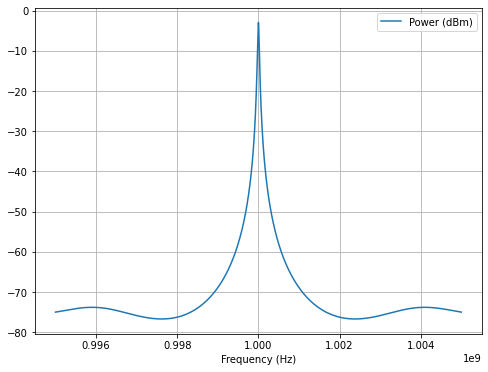

In [3]:
import labtoolkit.SpectrumAnalyser.AgilentE44nn


sa = labtoolkit.SpectrumAnalyser.AgilentE44nn.AgilentE44nn(
    MockAgilentE44nnInstrument()
)

sa.frequency_center = 1e9
sa.frequency_span = 10e6
sa.sweep_points = 8192
sa.OPC
df = sa.trace
# returns a DataFrame of the trace data
df.plot(grid=True, figsize=(8, 6))
df.attrs
# df.attrs are used to store metadata (sweep_time, resolution_bandwidth, etc)

In [4]:
df

,Power (dBm)
Frequency (Hz),
9.950000e+08,-75.002171
9.950012e+08,-75.000050
9.950024e+08,-74.997927
9.950037e+08,-74.995803
9.950049e+08,-74.993678
...,...
1.004995e+09,-74.993678
1.004996e+09,-74.995803
1.004998e+09,-74.997927


``` Python
# Communicate with Hardware with PyVISA
import pyvisa
import labtoolkit.SpectrumAnalyser.AgilentE44nn


rm = pyvisa.ResourceManager()
sa = labtookit.SpectrumAnalyser.AgilentE44nn.AgilentE44nn(
    rm.open_resource('GPIB0::18::INSTR')
)

sa.frequency_center = 1e9
sa.frequency_span = 10e6
sa.sweep_points = 8192
sa.OPC
df = sa.trace
# returns a DataFrame of the trace data
df.plot(grid=True, figsize=(8, 6))
df.attrs
# df.attrs are used to store metadata (sweep_time, resolution_bandwidth, etc)
```